# Brianna Chernenkoff

## Research question/interests

I chose to use this data set to because I would like to see if the parameters have air pollutants are parasitiic to one another. Meaning I would like to determine if they have and inverse or positive relationship with one another, over the time span of a year. 

**Reasearch Question:** Do the parameters of different CO2, Benezene and NOx emmisons correlate to one another in a parasitic way? 


In [ ]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pylab as plt
df_bri = pd.read_csv  ("../data/raw/AirQualityUCI.csv", sep=";")

df_bri

,",Date,Time,NOx.GT,PT08.S3.NOx,NO2.GT,PT08.S4.NO2,T,RH,AH"
0,"0,10/03/2004,18.00.00,166.0,1056.0,113.0,1692...."
1,"1,10/03/2004,19.00.00,103.0,1174.0,92.0,1559.0..."
2,"2,10/03/2004,20.00.00,131.0,1140.0,114.0,1555...."
3,"3,10/03/2004,21.00.00,172.0,1092.0,122.0,1584...."
4,"4,10/03/2004,22.00.00,131.0,1205.0,116.0,1490...."
...,...
9352,"9352,04/04/2005,10.00.00,472.0,539.0,190.0,137..."
9353,"9353,04/04/2005,11.00.00,353.0,604.0,179.0,126..."
9354,"9354,04/04/2005,12.00.00,293.0,603.0,175.0,124..."
9355,"9355,04/04/2005,13.00.00,235.0,702.0,156.0,104..."


## Data Cleaning 

In [ ]:

df_bri = df_bri.drop(columns=['Unnamed: 15','Unnamed: 16'])
df_bri.drop_duplicates()
df_bri.dropna(axis=0)
df_bri = df_bri.reset_index(drop=True)
df_bri.nunique(axis=0)
df_bri

KeyError: "['Unnamed: 15', 'Unnamed: 16'] not found in axis"

## Data Description/First Visualization 

In [ ]:
df_bri.shape
df_bri.head()
df_bri.columns
#Loading all possible varible names in the data set



Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [ ]:
df_bri.dropna()
df_bri.nunique(axis=0)
#Removing nan-values 

Date              391
Time               24
CO(GT)            104
PT08.S1(CO)      1042
NMHC(GT)          430
C6H6(GT)          408
PT08.S2(NMHC)    1246
NOx(GT)           926
PT08.S3(NOx)     1222
NO2(GT)           284
PT08.S4(NO2)     1604
PT08.S5(O3)      1744
T                 437
RH                754
AH               6684
dtype: int64

In [ ]:
#Preview of all varibles 
df_bri.nunique(axis=0)
df_bri.describe().apply(lambda t: t.apply(lambda x: format(x, 'f')))



,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


C:\Users\Bree_\AppData\Local\Temp\ipykernel_22904\1439965271.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_bri.corr()


[Text(0.5, 1.0, 'Heatmap of Parameters')]

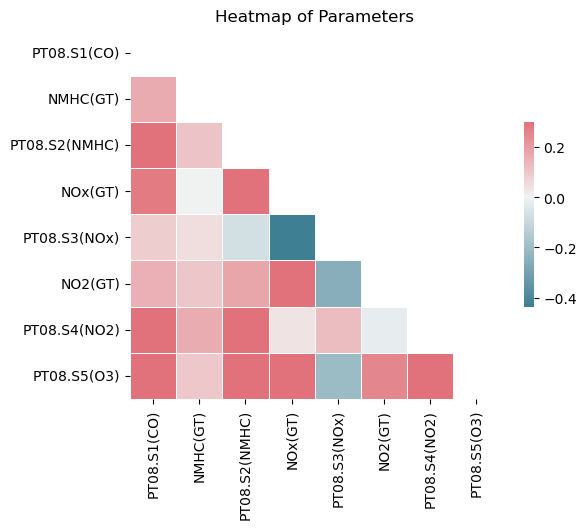

In [ ]:
corr = df_bri.corr()

# Generate a mask for the top right so we only generate one correlation per 
# pair of factors.
mask = np.triu(np.ones_like(corr, dtype=np.bool_))

# Generate custom color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create figure using seaborn:
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
heatmap.set(title='Heatmap of Parameters')

#Initial Visualization 


## EDA Analysis

### Research Question Revsion
- ~~**First Research Question:** Do the parameters of different CO2, Benezene and NOx emmisons correlate to one another in a parasitic way?~~
- **Second Research Question (revised):**  What is causing the Nitrogenous oxides to have a negative correlating relationship with one another? 


In [ ]:
# An Initial Preview/ minimal cleaning
df_bri_1 = pd.read_csv("../data/raw/AirQualityUCI.csv", sep= ";")
df_bri_1.info()
df_bri_1.head(25)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
5,10/03/2004,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848",NaN,NaN
6,11/03/2004,00.00.00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603",NaN,NaN
7,11/03/2004,01.00.00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702",NaN,NaN
8,11/03/2004,02.00.00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648",NaN,NaN
9,11/03/2004,03.00.00,"0,6",1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517",NaN,NaN


In [ ]:
#Renaming Columns to be used and dropping unecessary ones
df_bri_1 =df_bri_1.rename(columns={'NOx(GT)':'NOx.GT', 'PT08.S3(NOx)': 'PT08.S3.NOx', 'PT08.S4(NO2)':'PT08.S4.NO2', 'NO2(GT)':'NO2.GT'})


In [ ]:
#Cleaning/removing unessessary columns
df_bri_1= df_bri_1.drop (columns=['Unnamed: 15','Unnamed: 16','CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)', 'PT08.S2(NMHC)','PT08.S5(O3)'])
df_bri_1= df_bri_1.dropna()
df_bri_1

,Date,Time,NOx.GT,PT08.S3.NOx,NO2.GT,PT08.S4.NO2,T,RH,AH
0,10/03/2004,18.00.00,166.0,1056.0,113.0,1692.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,103.0,1174.0,92.0,1559.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,131.0,1140.0,114.0,1555.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,172.0,1092.0,122.0,1584.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,131.0,1205.0,116.0,1490.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,472.0,539.0,190.0,1374.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,353.0,604.0,179.0,1264.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,293.0,603.0,175.0,1241.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,235.0,702.0,156.0,1041.0,"28,3","13,5","0,5139"


In [ ]:
import datetime
conv_dt = lambda x: (datetime.datetime.strptime(x, "%d/%m/%Y %H.%M.%S") if isinstance(x, str) else np.nan)


In [ ]:
# pd.to_datetime(pd.read_csv("../data/raw/AirQualityUCI.csv", sep= ";", parse_dates=[["Date", "Time"]], infer_datetime_format=True, dayfirst=True, nrows=5).Date_Time,
                # format="%d/%m/%Y %H.%M.%S")
# Changed date and time format
pd.read_csv("../data/raw/AirQualityUCI.csv", sep= ";", parse_dates=[["Date", "Time"]], date_parser=conv_dt, nrows=9357).Date_Time

df_bri_1

,Date,Time,NOx.GT,PT08.S3.NOx,NO2.GT,PT08.S4.NO2,T,RH,AH
0,10/03/2004,18.00.00,166.0,1056.0,113.0,1692.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,103.0,1174.0,92.0,1559.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,131.0,1140.0,114.0,1555.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,172.0,1092.0,122.0,1584.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,131.0,1205.0,116.0,1490.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,472.0,539.0,190.0,1374.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,353.0,604.0,179.0,1264.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,293.0,603.0,175.0,1241.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,235.0,702.0,156.0,1041.0,"28,3","13,5","0,5139"


In [ ]:
df_bri_1.replace(to_replace=",", value=".",regex=True, inplace=True )
df_bri_1=df_bri_1.astype({'T': 'float', 'AH':'float','RH':'float'})

df_bri_1_cleaned = df_bri_1.reset_index(drop=True)

df_bri_1_cleaned.dtypes

Date            object
Time            object
NOx.GT         float64
PT08.S3.NOx    float64
NO2.GT         float64
PT08.S4.NO2    float64
T              float64
RH             float64
AH             float64
dtype: object

C:\Users\Bree_\AppData\Local\Temp\ipykernel_22904\3633004792.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_bri_1_cleaned.corr()


[Text(0.5, 1.0, 'Heatmap of Nitrogenous parameters')]

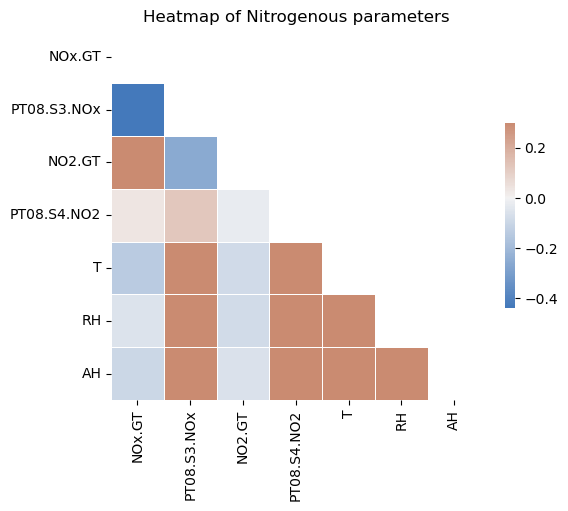

In [ ]:
#df_bri_1_cleaned Heat Map 
corr = df_bri_1_cleaned.corr()

# Generate a mask for the top right so we only generate one correlation per 
# pair of factors.
mask = np.triu(np.ones_like(corr, dtype=np.bool_))

# Generate custom color map
cmap = sns.diverging_palette(250, 25, as_cmap=True)

# Create figure using seaborn:
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
heatmap.set(title='Heatmap of Nitrogenous parameters')

### Observations (from Heat Map)

- NOx.GT has an inverse relationship between temperature and humditiy (both Absolute and Relative)  
- NOx.GT and PT08.S4 also have a strong inverse relationship
- NO2.GT and PT08.S4.NO2 have no correlating relationship 
- PT08.S3.NOx and NO2.GT so have an inverse realationship 
- NOx.GT and PT08.S3.NOx have a strong inverse relationship 

<seaborn.axisgrid.PairGrid>

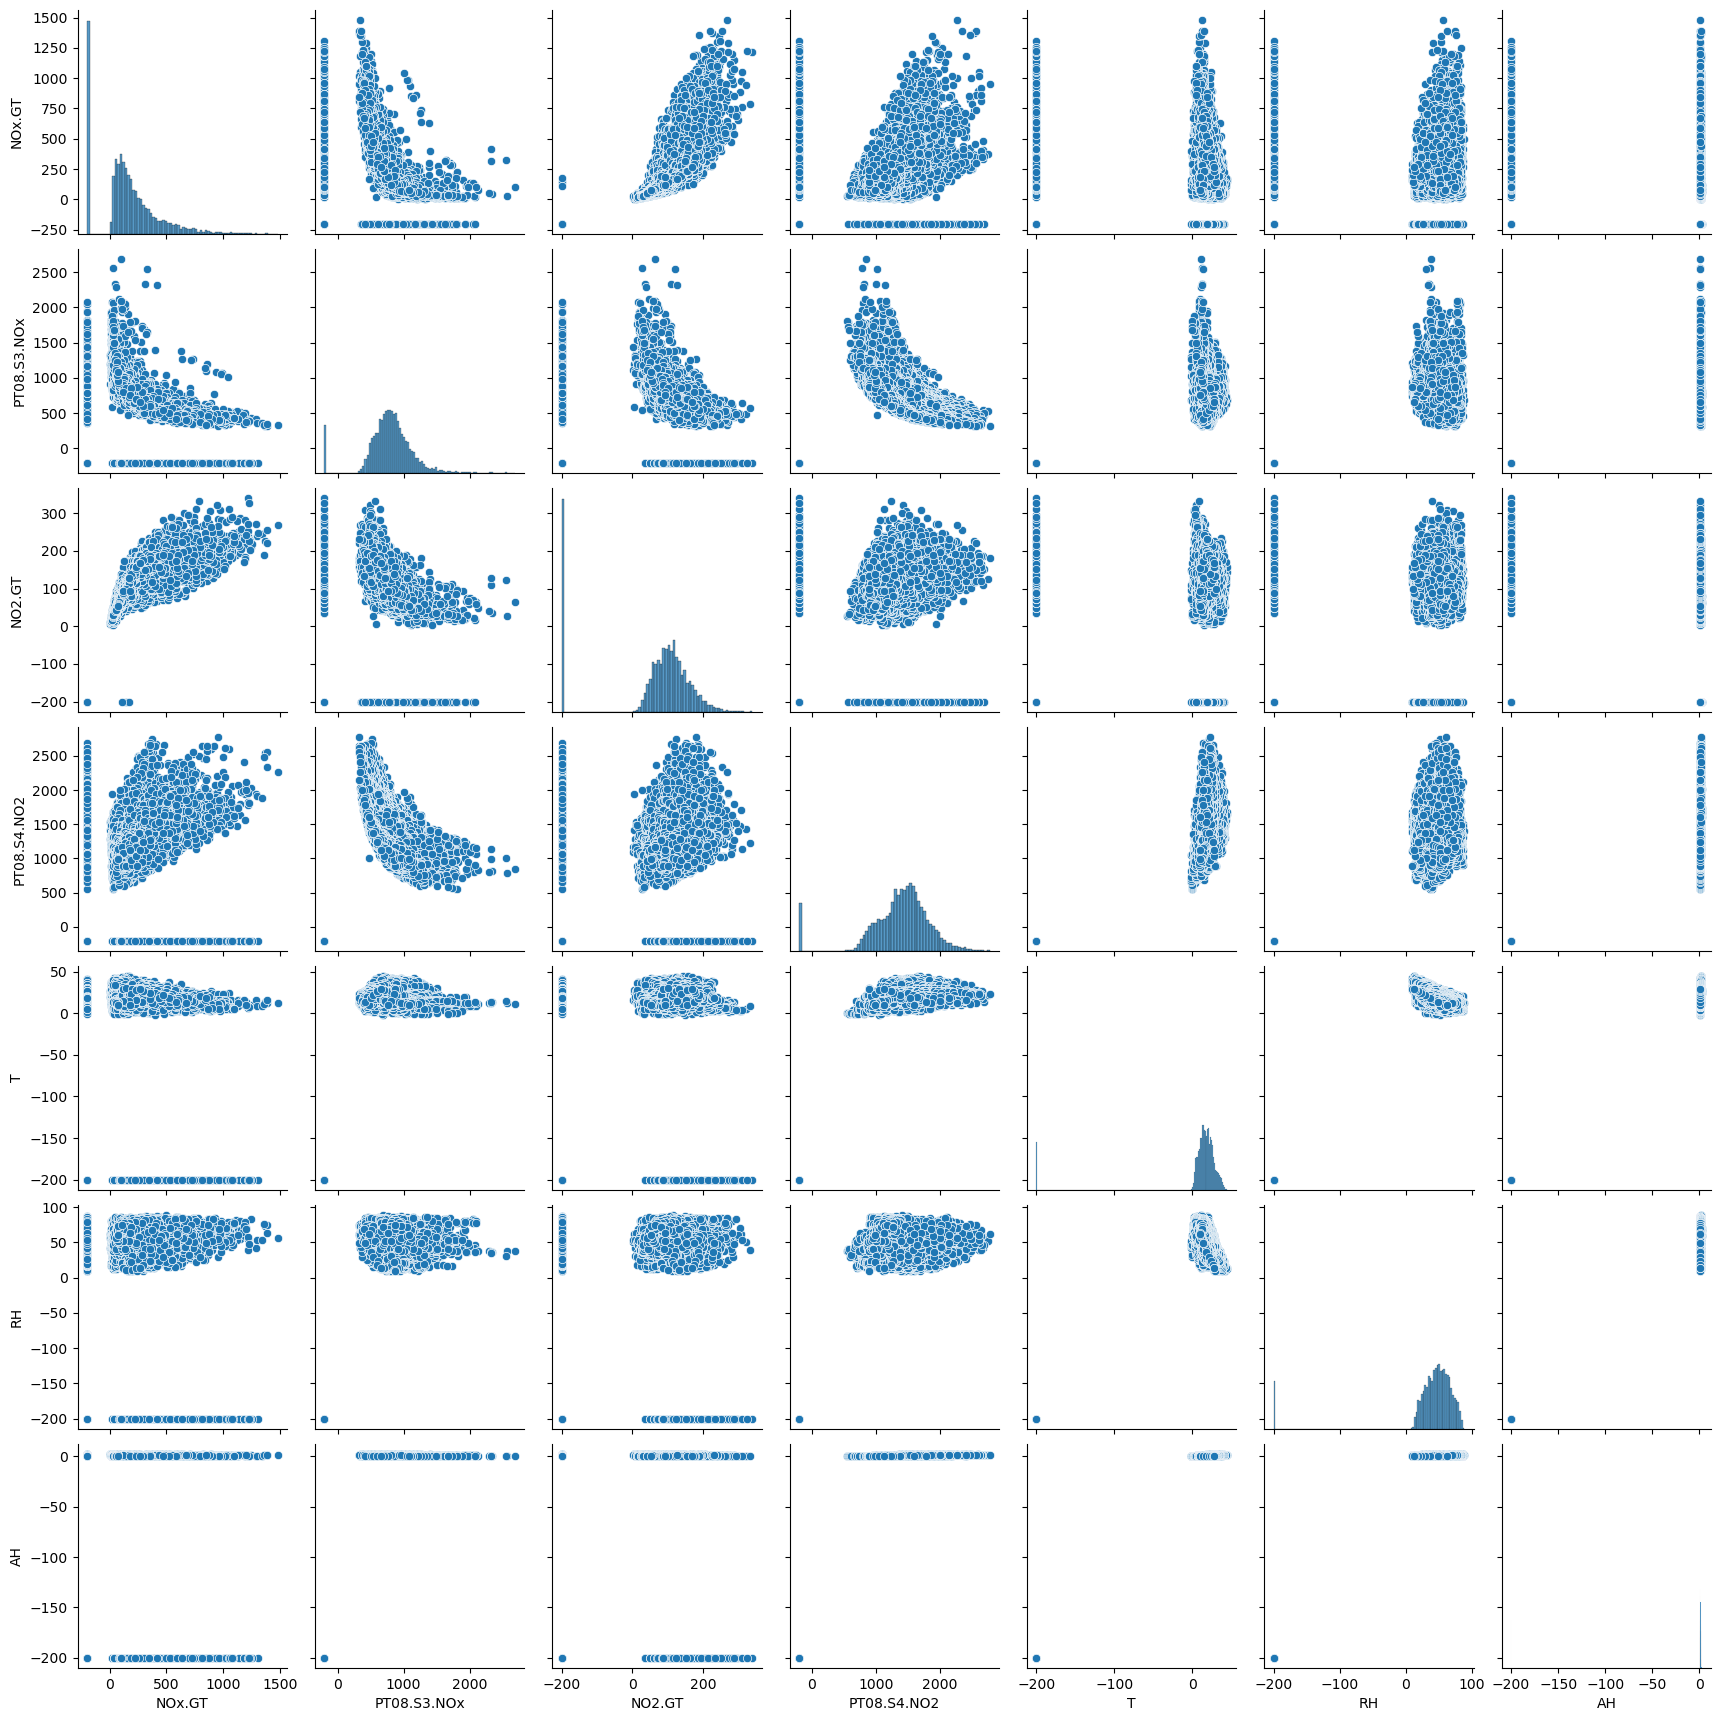

In [ ]:
sns.pairplot(df_bri_1_cleaned)

### Milestone 4 Visualizations, Analysis and Partial Pipeline

#### Analysis Pipeline


In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pylab as plt 
import datetime 

df_bri_2 =pd.read_csv("../data/raw/AirQualityUCI.csv", sep=";")

df_bri_2

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Data Cleaning/ Renaming 
df_bri_2 = df_bri_2.rename(columns={'NOx(GT)':'NOx.GT', 'PT08.S3(NOx)': 'PT08.S3.NOx', 'PT08.S4(NO2)':'PT08.S4.NO2', 'NO2(GT)':'NO2.GT'})
df_bri_2 = df_bri_2.drop(columns=['Unnamed: 15','Unnamed: 16','CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)', 'PT08.S2(NMHC)','PT08.S5(O3)'])
df_bri_2 = df_bri_2.drop_duplicates()
df_bri_2 = df_bri_2.dropna()


In [ ]:
#Changing variables
df_bri_2.replace(to_replace=",", value=".",regex=True, inplace=True )
df_bri_2= df_bri_2.astype({'T': 'float', 'AH':'float','RH':'float'})

#Resetting Index 
df_bri_2_cleaned = df_bri_2.reset_index(drop=True)
df_bri_1_cleaned

,Date,Time,NOx.GT,PT08.S3.NOx,NO2.GT,PT08.S4.NO2,T,RH,AH
0,10/03/2004,18.00.00,166.0,1056.0,113.0,1692.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,103.0,1174.0,92.0,1559.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,131.0,1140.0,114.0,1555.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,172.0,1092.0,122.0,1584.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,131.0,1205.0,116.0,1490.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,472.0,539.0,190.0,1374.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,353.0,604.0,179.0,1264.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,293.0,603.0,175.0,1241.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,235.0,702.0,156.0,1041.0,28.3,13.5,0.5139


In [ ]:
#Coverting date time 

conv_dt = lambda x: (datetime.datetime.strptime(x, "%d/%m/%Y %H.%M.%S") if isinstance(x, str) else np.nan)
pd.read_csv("../data/raw/AirQualityUCI.csv", sep= ";", parse_dates=[["Date", "Time"]], date_parser=conv_dt, nrows=9357).Date_Time


df_bri_2_cleaned

ValueError: Missing column provided to 'parse_dates': 'Date, Time'

#### Method Changing 


In [ ]:
import pandas as pd 
import numpy as np 
import df_bri_2_cleaned


df_bri_2_cleaned = (
pd.DataFrame()
)


SyntaxError: incomplete input (1549229577.py, line 7)